Define paths

In [7]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'

sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern2
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


Define variables and upload data for figures

In [6]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='edgegrowth2'
L=50; dx =1; J = int(L/dx)
T =3000; dt = 0.05; N = int(T/dt)
boundaryCoeff=2;rate=0.01
parID = 118194
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
# filename(mechanism,1)
parID_list = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/parID_list_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), 'rb'))
parID = parID_list[1]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism, parID)), 'rb'))


Plot solution U with peaks

In [3]:
def countPeaks(U,U_record, showPlot1D=True, showSurfPattern=True):
    peaks = [0,0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)
    if showPlot1D == True:
        plot1D(U,plotPeaks=True, peaks=peaks)
    if showSurfPattern==True:
        dx = float(L)/float(J)
        x_grid = np.array([j*dx for j in range(J)])
        record_every_x_hours = 10
        reduced_t_grid = np.arange(0,T,record_every_x_hours)     
        surfpattern2(U_record, [x_grid, reduced_t_grid],morphogen=[0,1],growth='linear',rate=0.1)
    return peaks



In [4]:



def varPeakDist(U, showplot1D=True,printVar=True):
    peaks = countPeaks(U, showplot1D=showplot1D)
    #calculate distance between peaks
    peak0 = peaks[0]
    #calculate distance between peaks in peak0
    var=[0,0]
    for count,peak in enumerate(peaks):
        if len(peak)>1:
            peak_dist = [np.linalg.norm(peak[i]-peak[i+1]) for i in range(len(peak)-1)]
            peak_dist = peak_dist/np.sum(peak_dist)
            var[count] = np.var(peak_dist)
        else:
            var[count] = 1
    if printVar==True:
        print(var)

    return var

407187.2


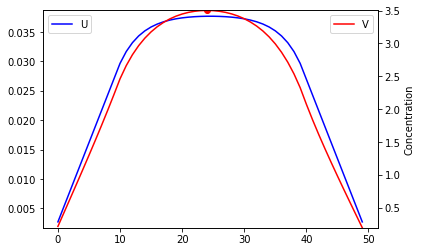

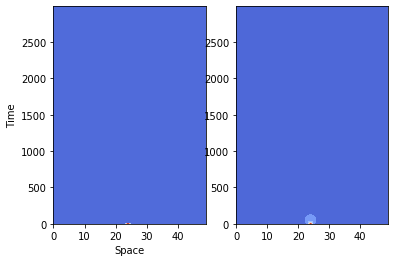

[0, 1]
844310.0


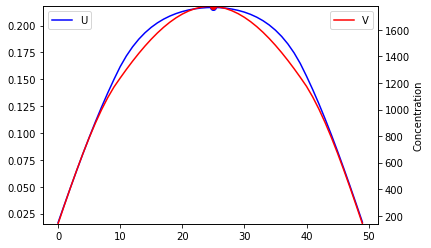

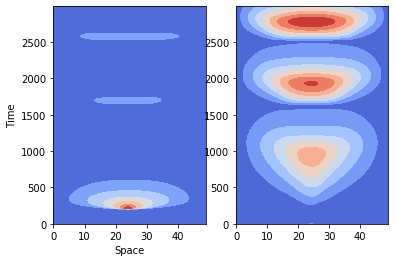

[1, 1]
1238632.0


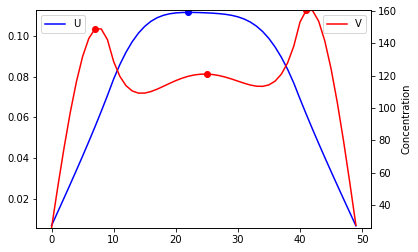

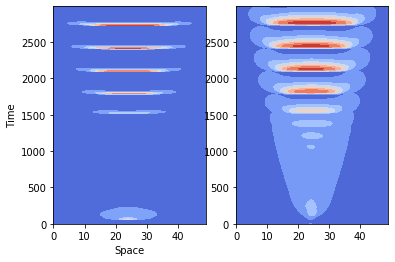

[1, 3]
1221073.2


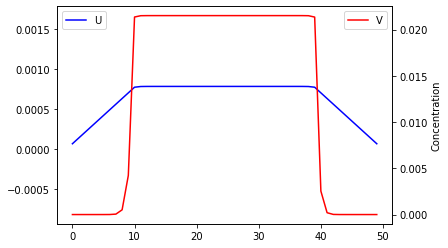

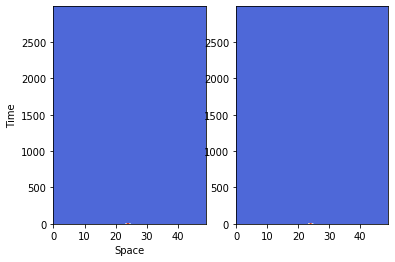

[0, 0]
1263426.0


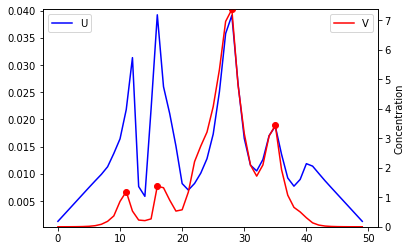

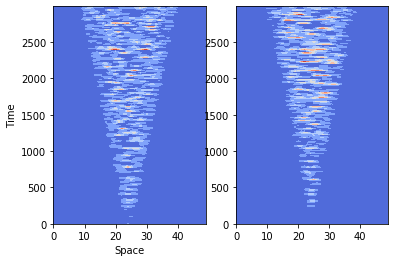

[0, 4]
1239651.0


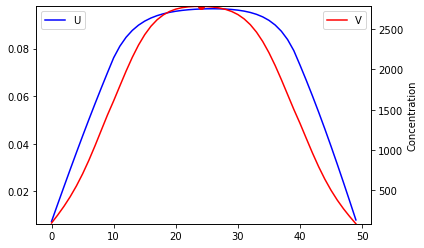

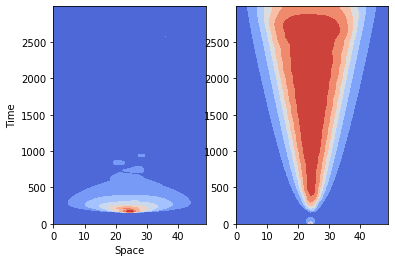

[0, 1]
1716939.2


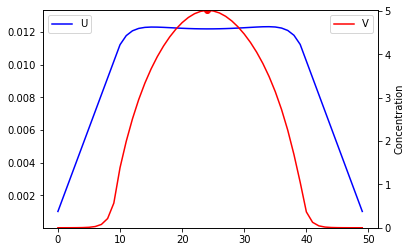

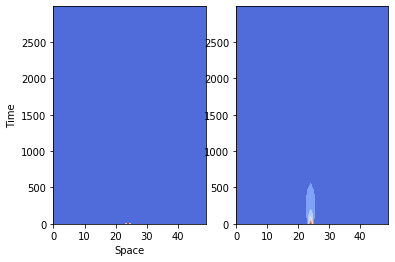

[0, 1]
625897.1


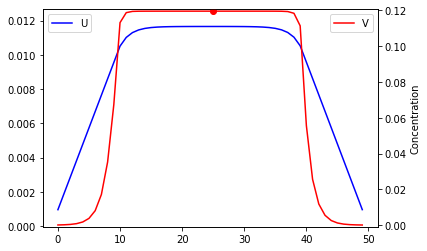

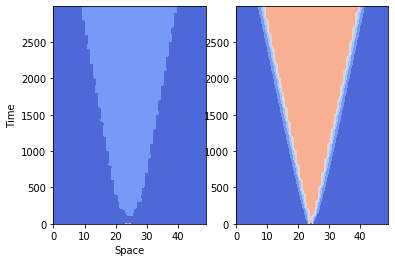

[0, 1]
94207.0


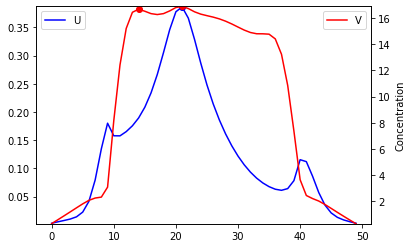

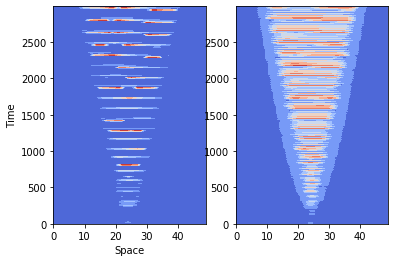

[1, 2]
586355.2


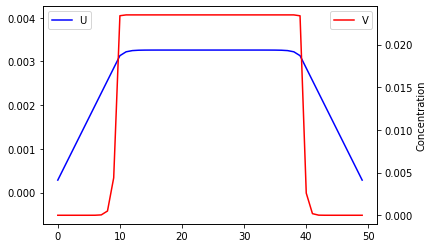

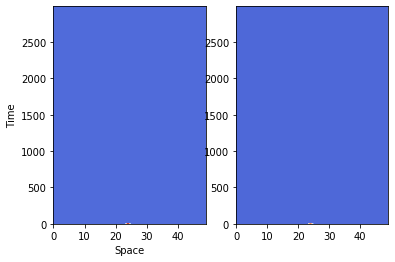

[0, 0]
94512.0


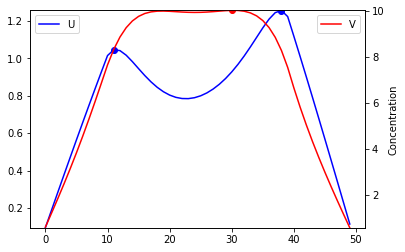

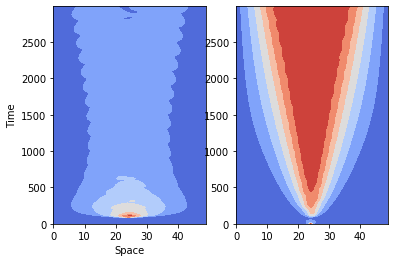

[2, 1]
peaks!!!
1764438.0


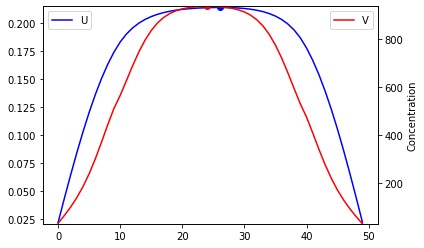

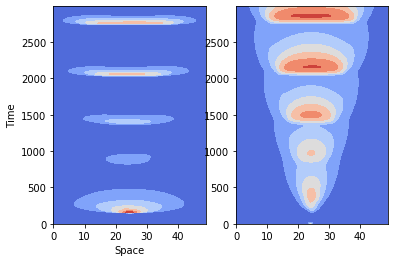

[1, 1]
1056167.0


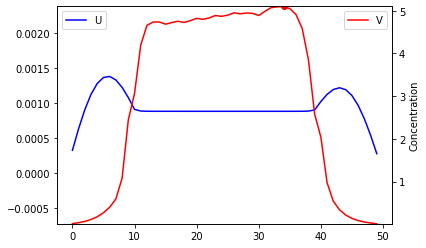

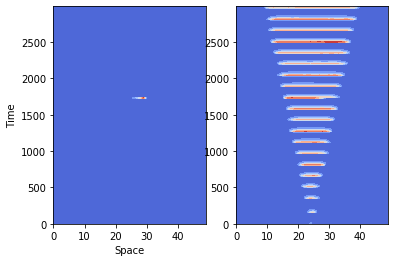

[0, 1]
554756.0


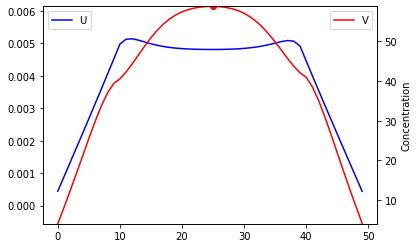

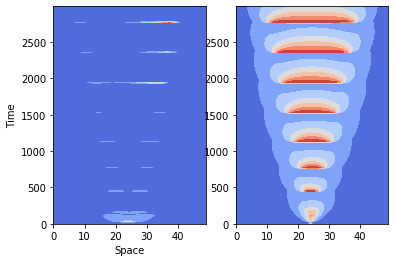

[0, 1]
222276.1


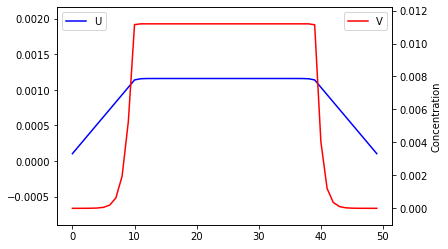

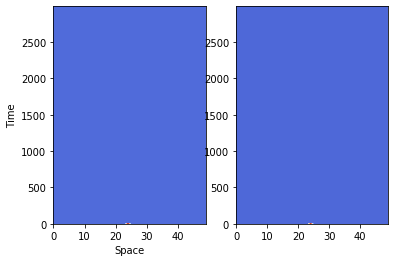

[0, 0]
1786017.2


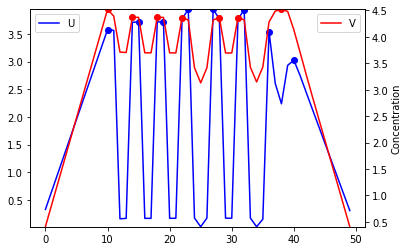

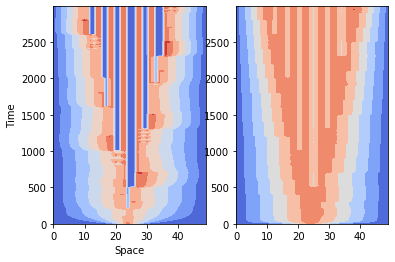

[8, 7]
peaks!!!
527280.0


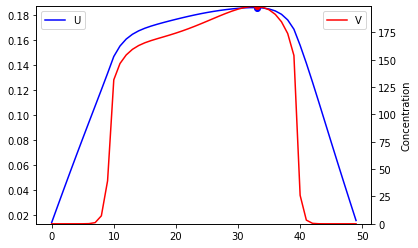

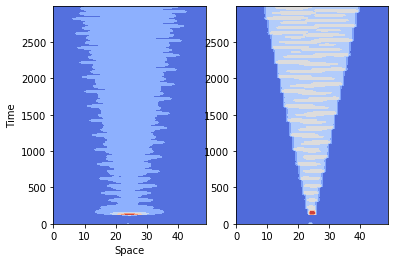

[1, 1]
125004.0


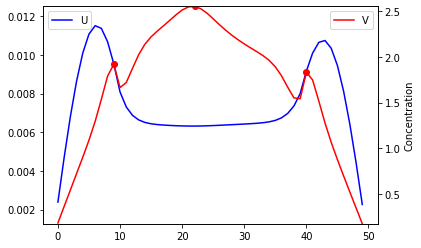

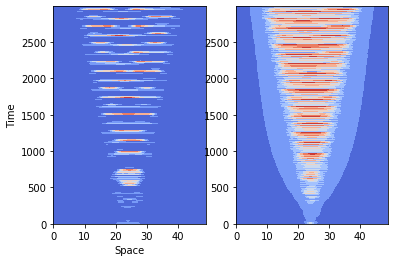

[0, 3]
844323.1


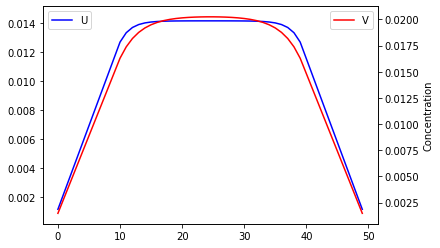

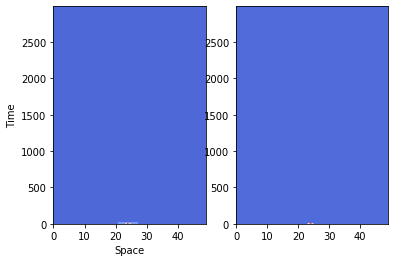

[0, 0]
236462.2


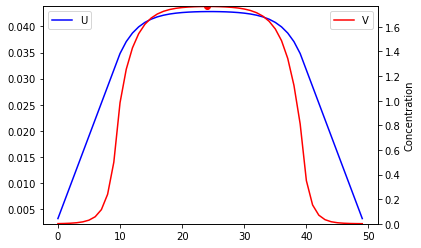

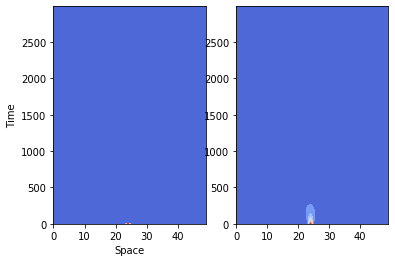

[0, 1]
684721.0


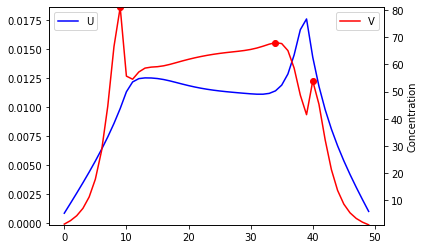

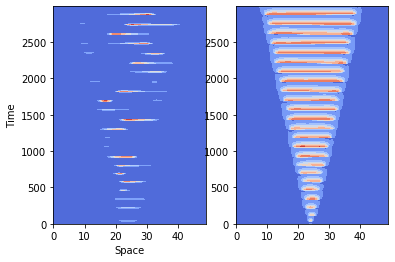

[0, 3]
1016888.2


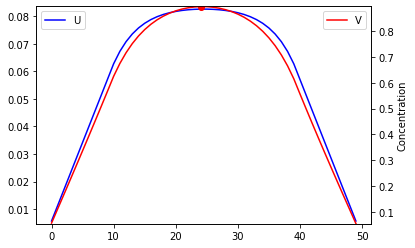

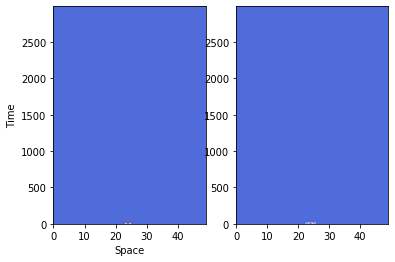

[0, 1]
185745.1


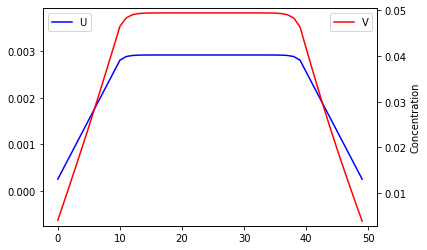

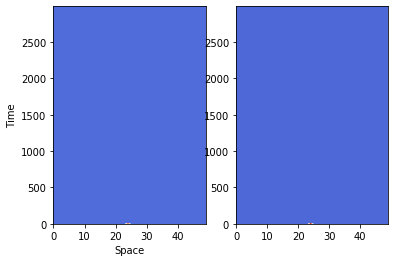

[0, 0]
1483064.3


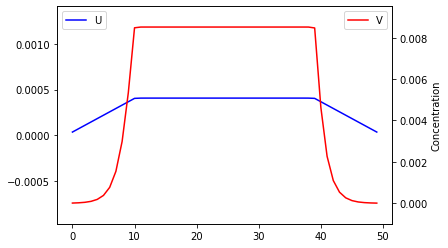

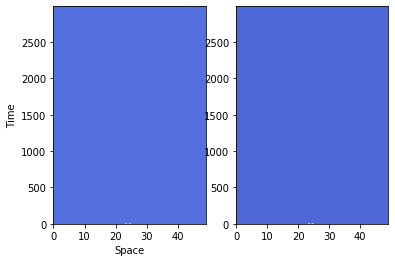

[0, 0]
1838456.0


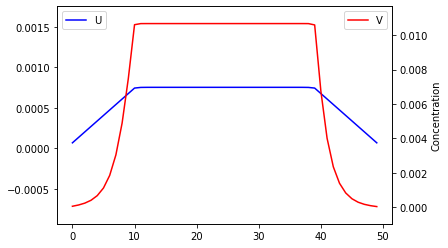

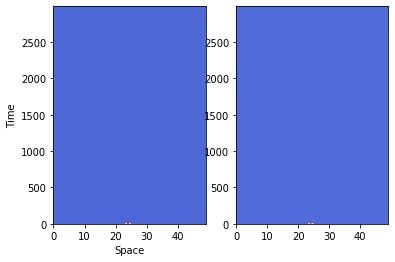

[0, 0]
86445.0


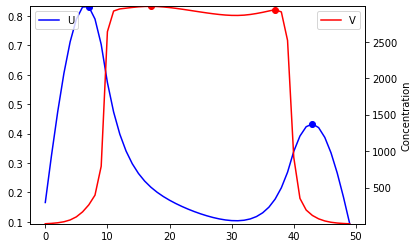

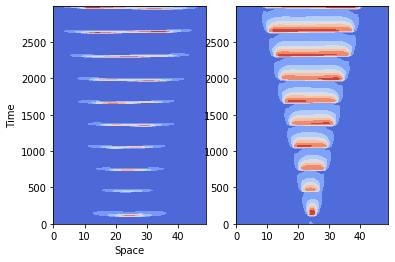

[2, 2]
peaks!!!
1205457.0


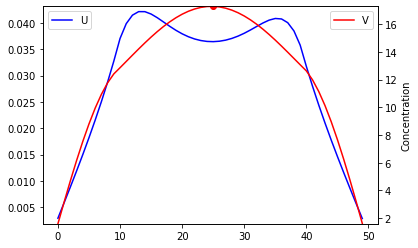

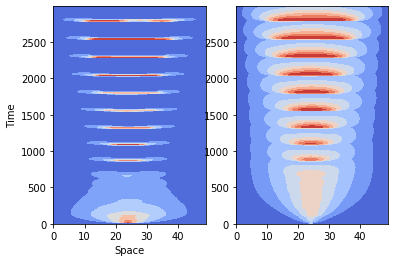

[0, 1]
682498.2


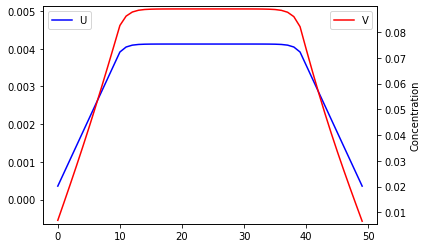

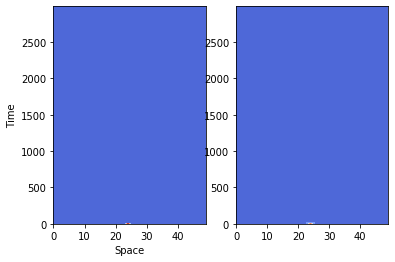

[0, 0]
1535226.2


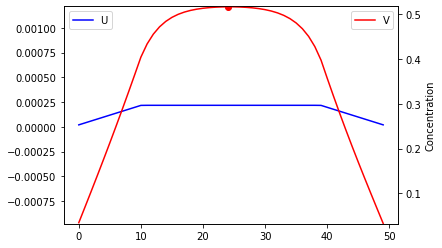

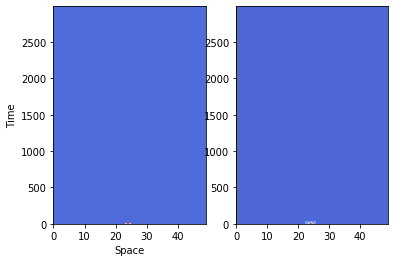

[0, 1]
1117304.2


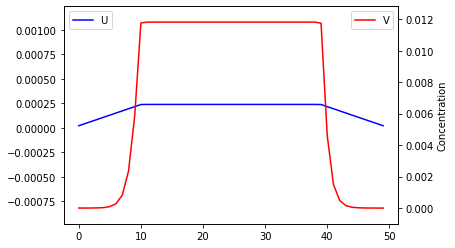

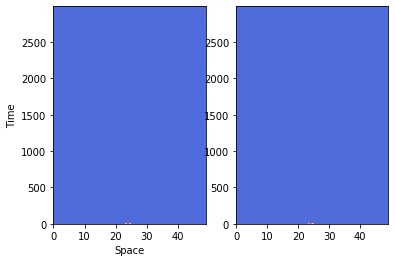

[0, 0]
1681883.2


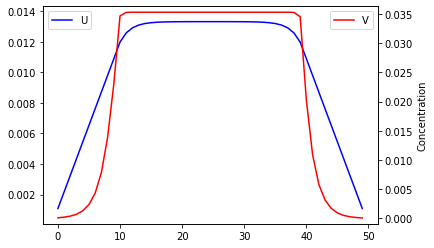

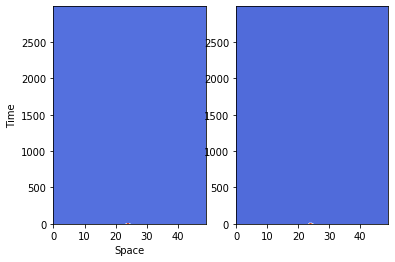

[0, 0]
69435.0


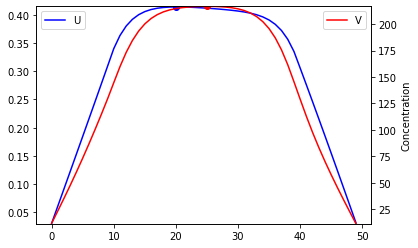

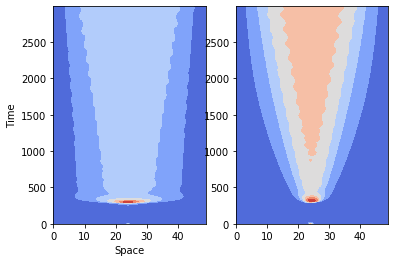

[1, 1]
575607.0


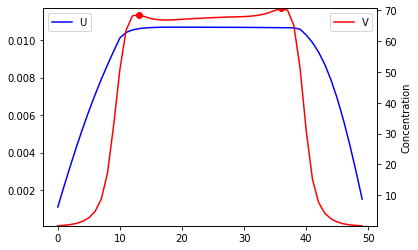

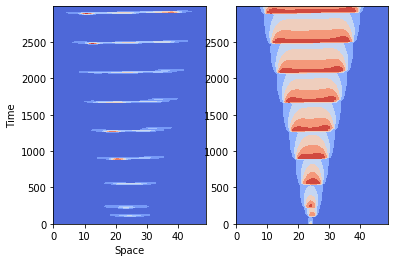

[0, 2]
518381.0


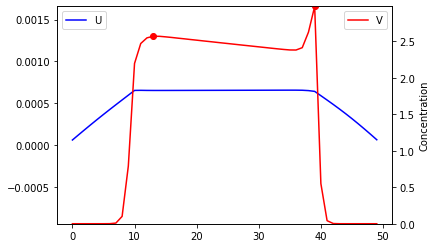

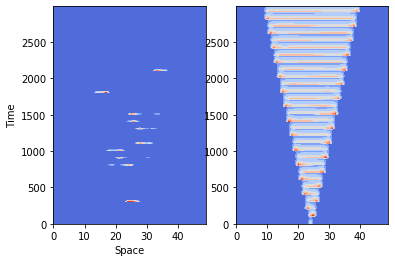

[0, 2]
147158.0


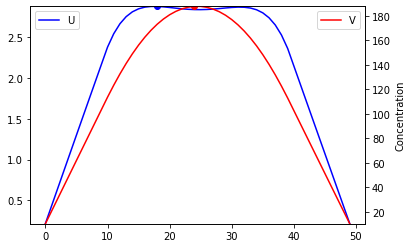

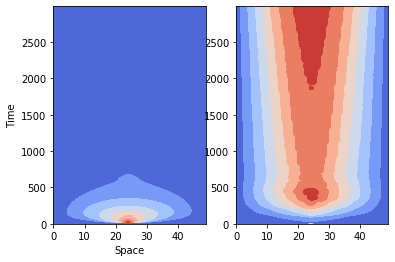

[1, 1]
1816131.0


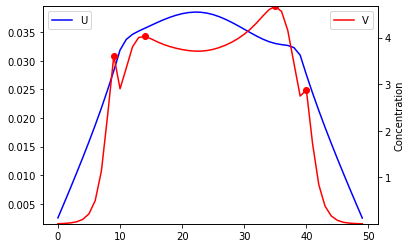

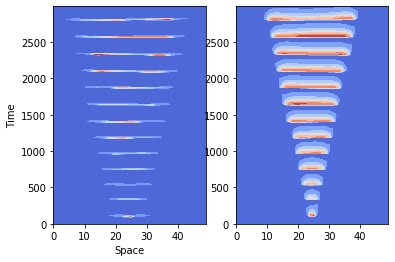

[0, 4]
829506.0


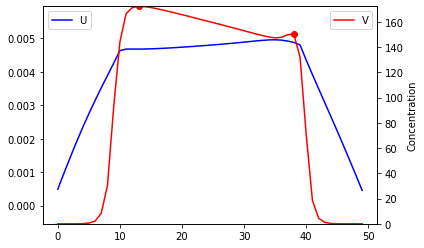

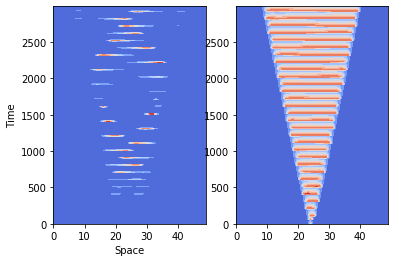

[0, 2]
1583319.2


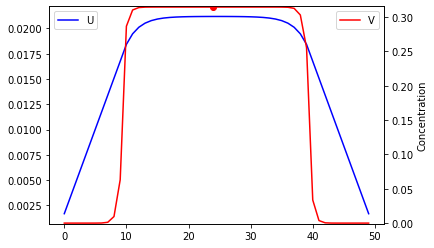

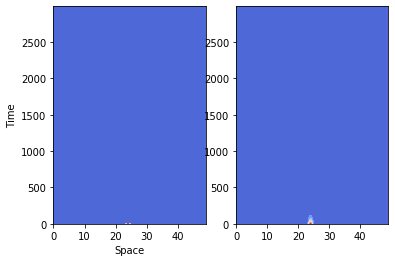

[0, 1]
1406993.0


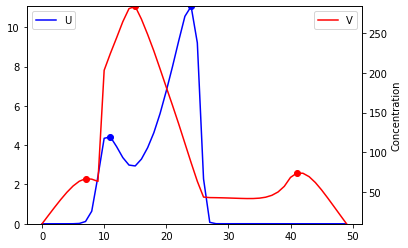

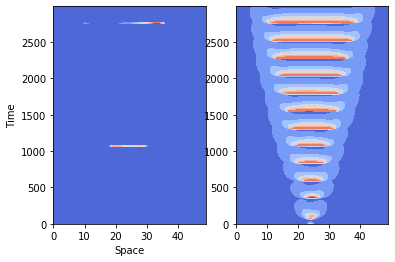

[2, 3]
peaks!!!
1423390.0


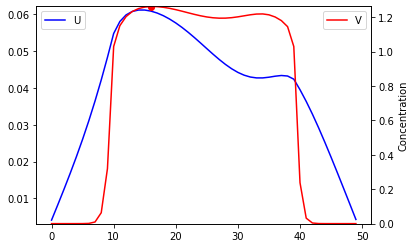

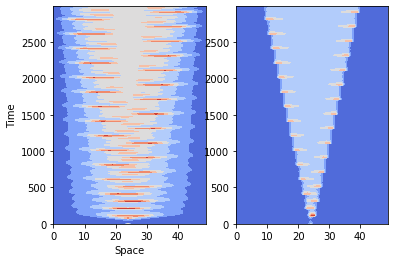

[0, 1]
1819730.0


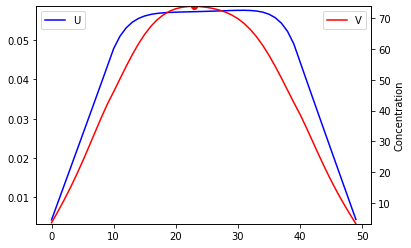

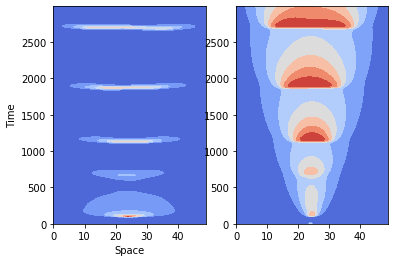

[0, 1]
1585143.0


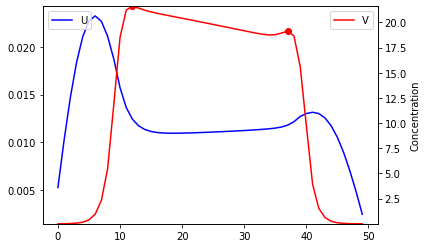

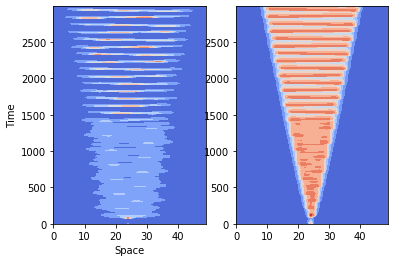

[0, 2]
731404.0


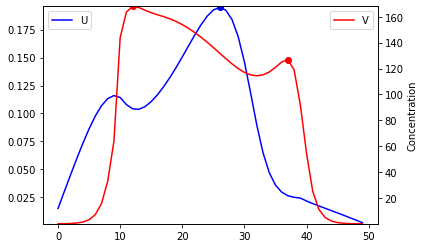

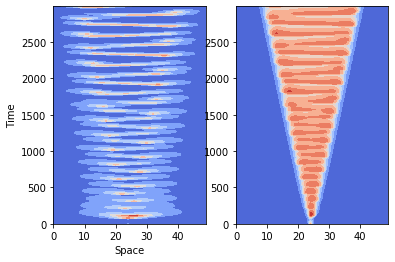

[1, 2]
703099.0


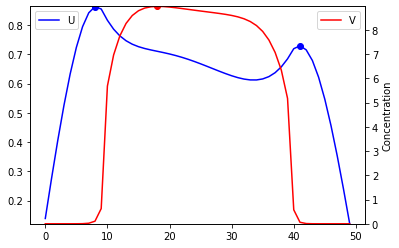

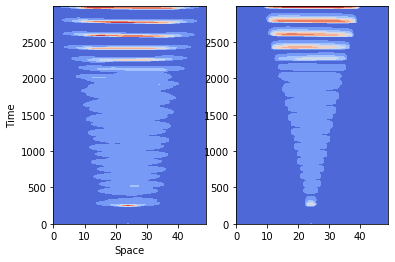

[2, 1]
peaks!!!
240907.0


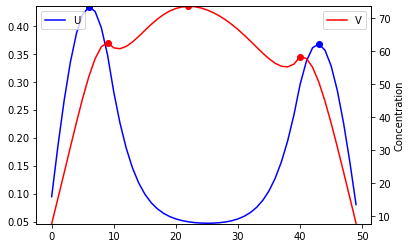

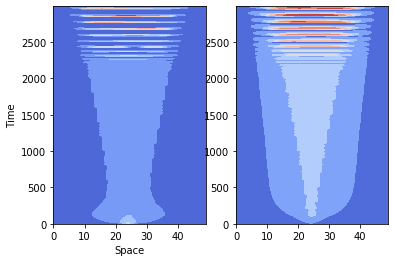

[2, 3]
peaks!!!
706505.1


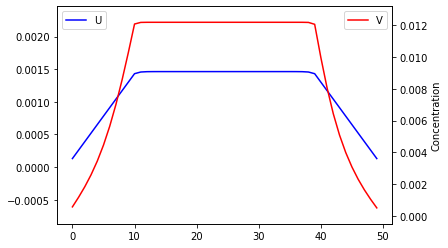

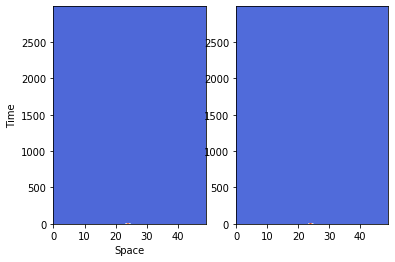

[0, 0]
1486578.2


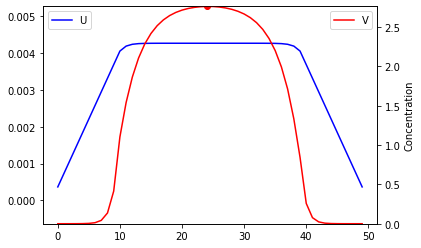

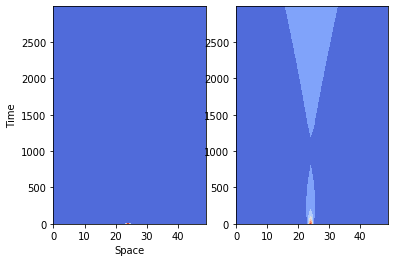

[0, 1]
1018998.2


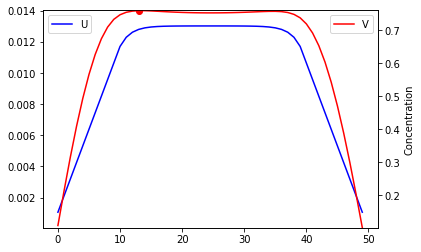

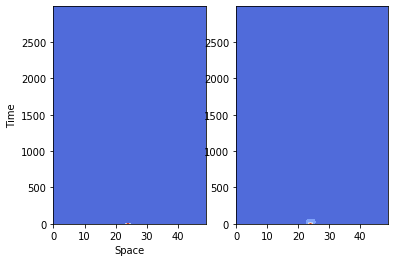

[0, 1]
602524.0


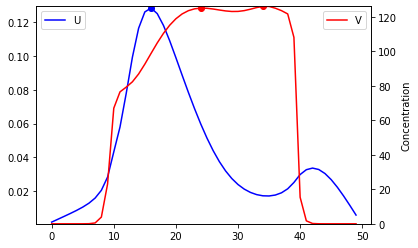

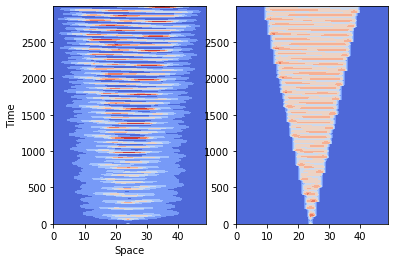

[1, 2]
620842.0


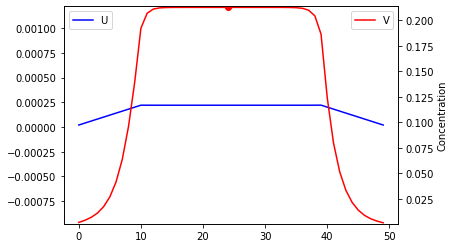

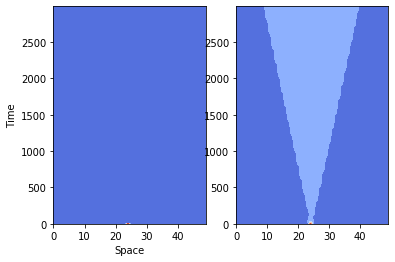

[0, 1]
1469731.1


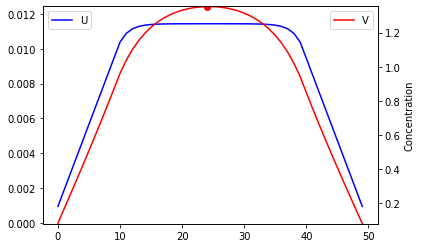

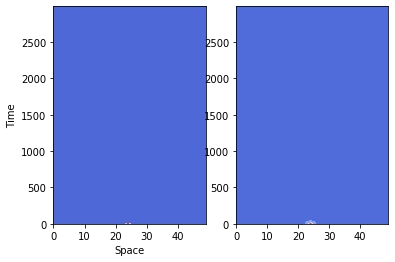

[0, 1]
1923609.0


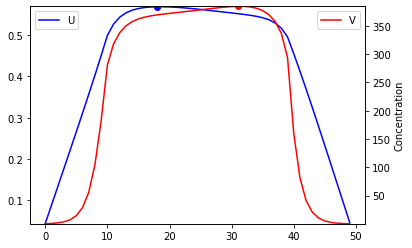

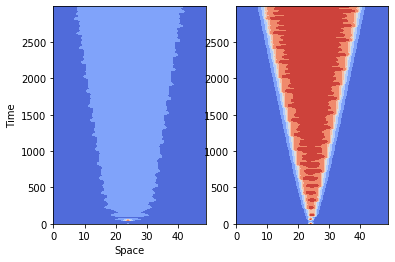

[1, 1]
1760578.0


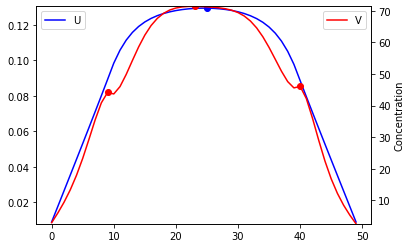

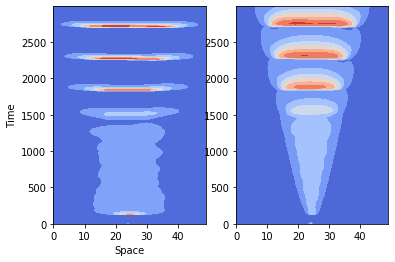

[1, 3]
81025.0


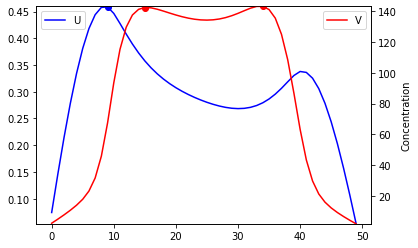

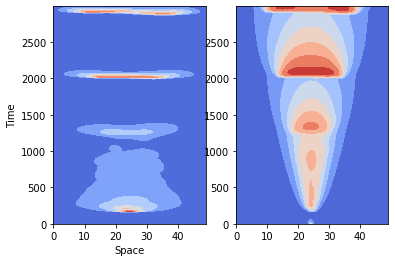

[1, 2]
746091.0


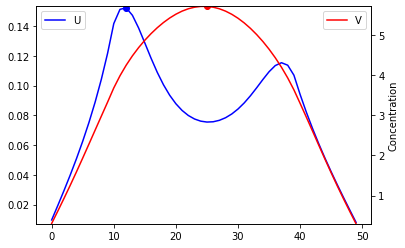

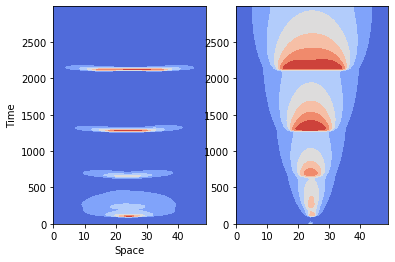

[1, 1]
1990086.1


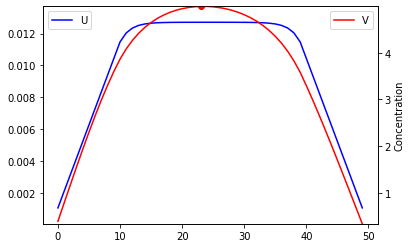

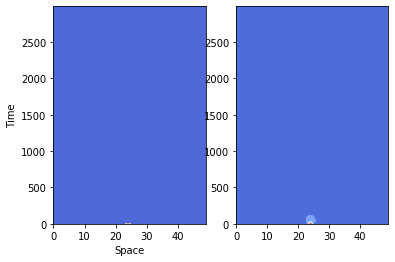

[0, 1]
384925.0


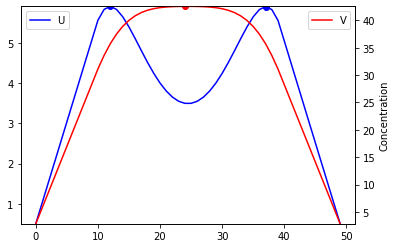

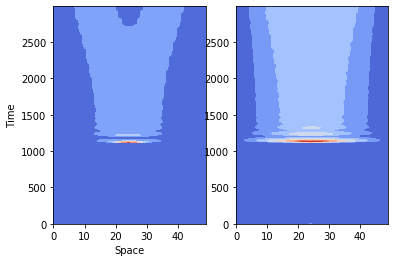

[2, 1]
peaks!!!
983928.0


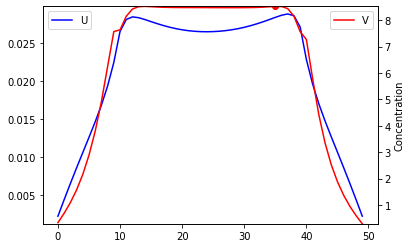

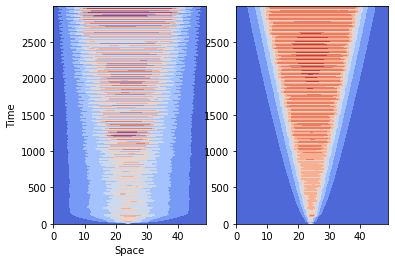

[0, 1]
375643.2


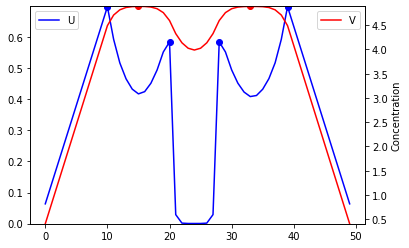

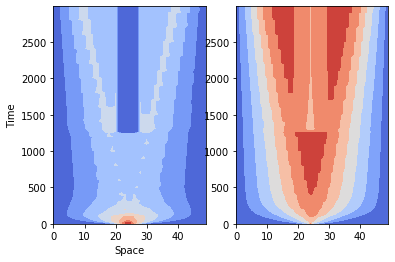

[4, 2]
peaks!!!
72101.2


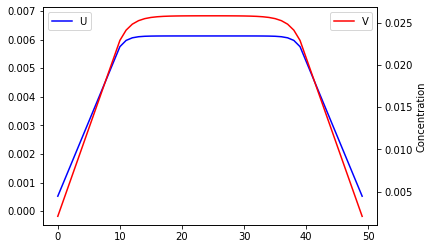

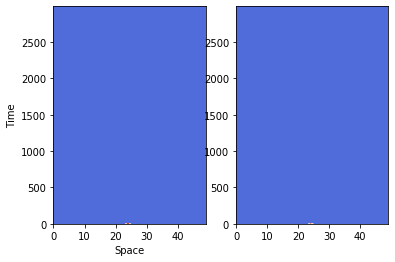

[0, 0]
275595.0


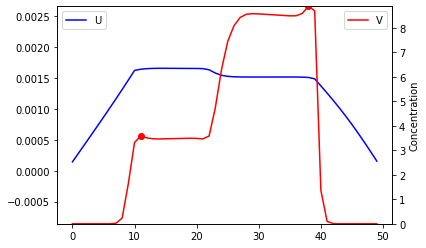

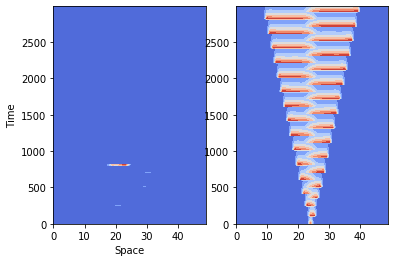

[0, 2]
268350.0


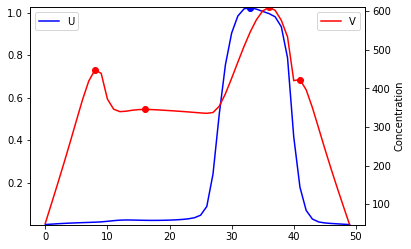

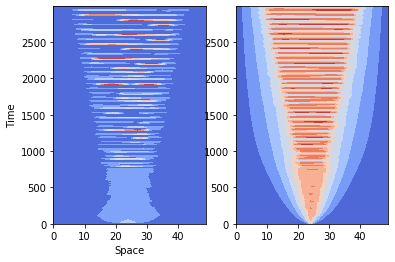

[1, 4]
77837.0


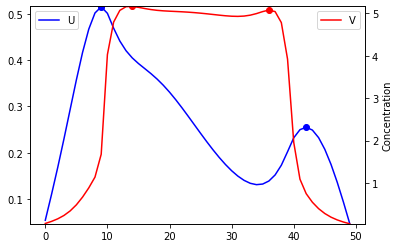

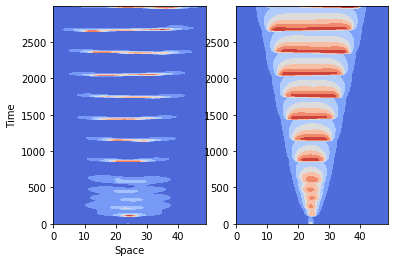

[2, 2]
peaks!!!
1609860.0


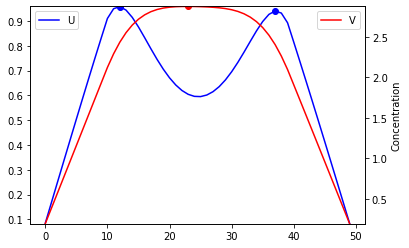

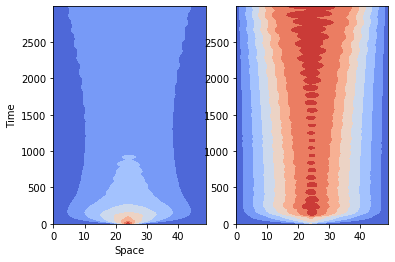

[2, 1]
peaks!!!
520962.0


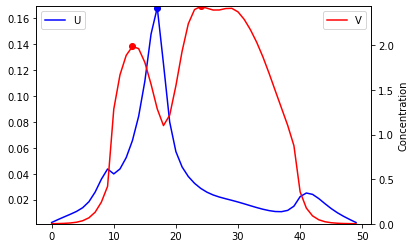

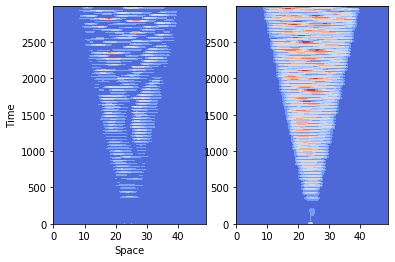

[1, 2]
1754796.0


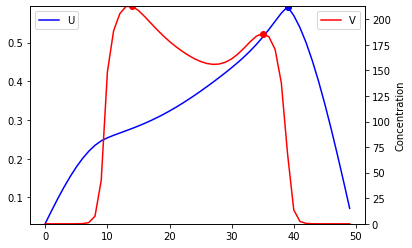

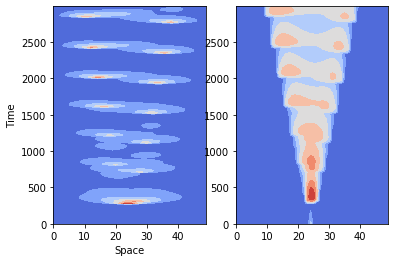

[1, 2]
1010740.0


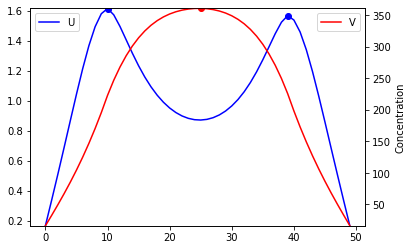

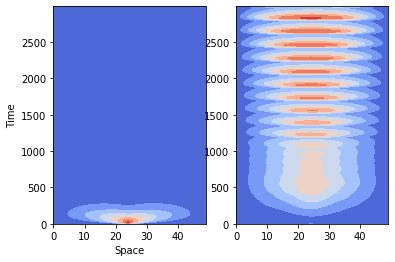

[2, 1]
peaks!!!
302611.0


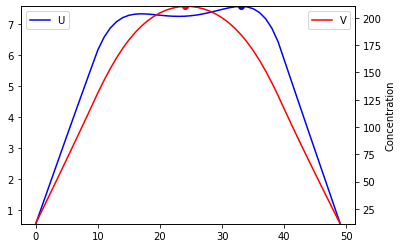

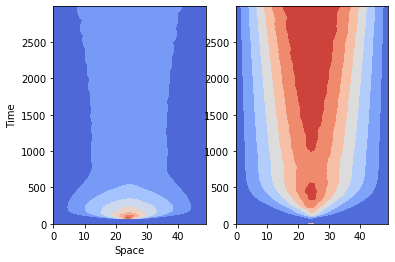

[1, 1]
1125998.0


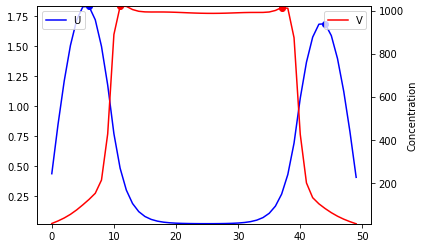

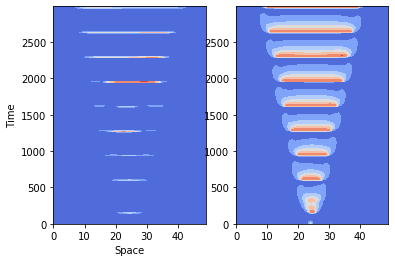

[2, 2]
peaks!!!
64753.2


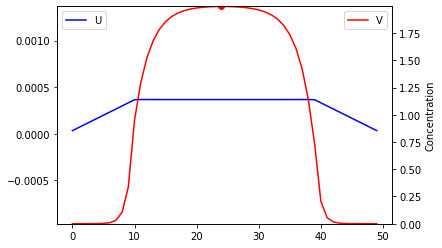

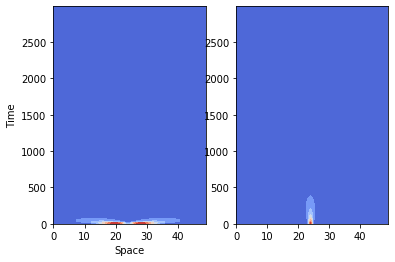

[0, 1]
323464.0


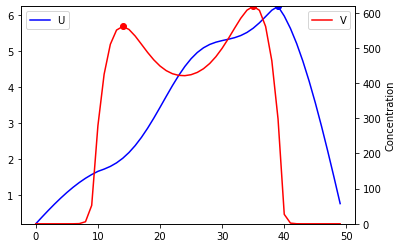

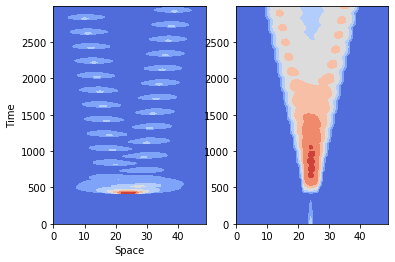

[1, 2]
1869593.1


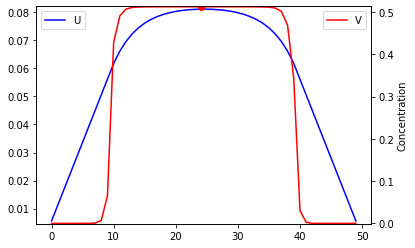

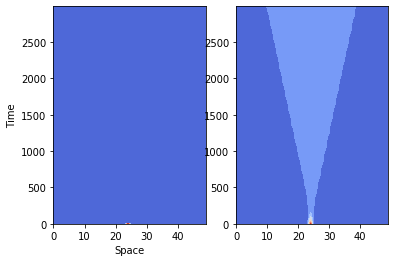

[0, 1]
1772739.1


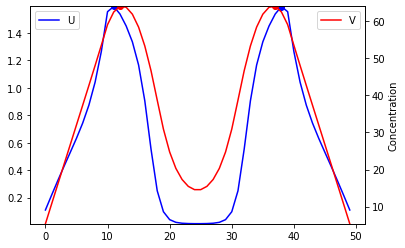

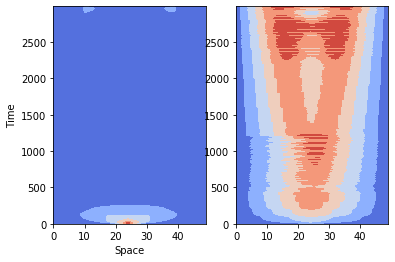

[2, 2]
peaks!!!
1261761.2


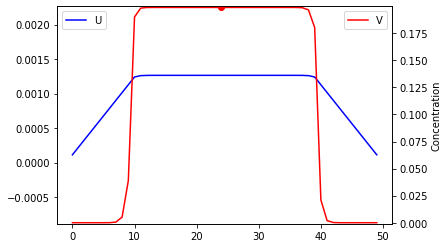

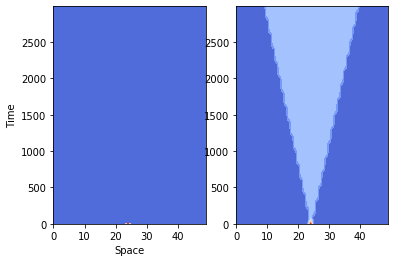

[0, 1]
178777.0


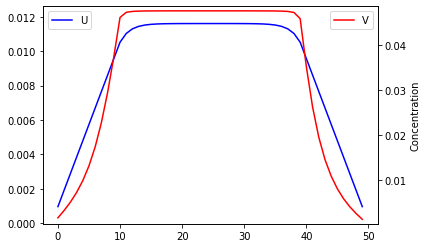

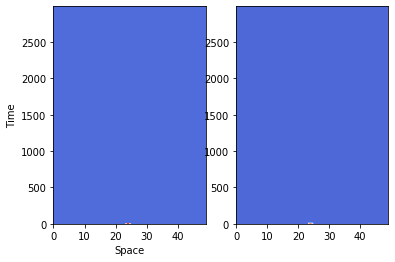

[0, 0]
1487107.0


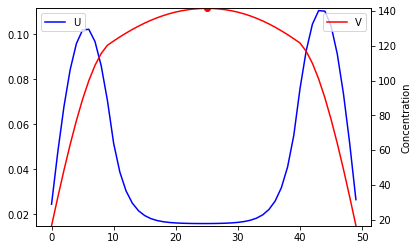

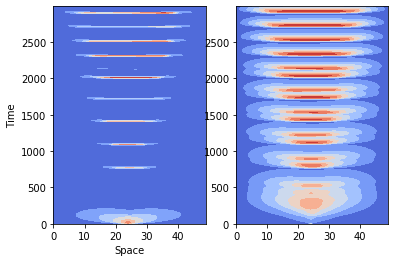

[0, 1]
1384462.2


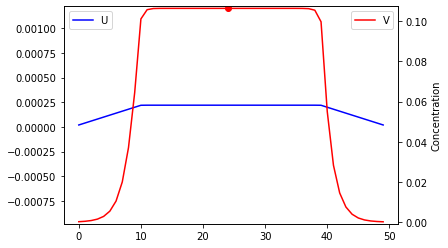

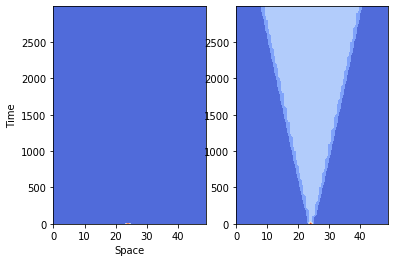

[0, 1]
920721.0


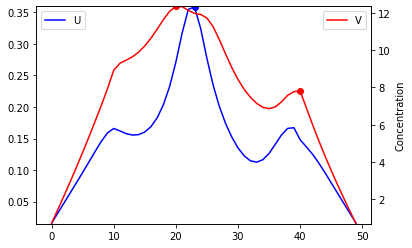

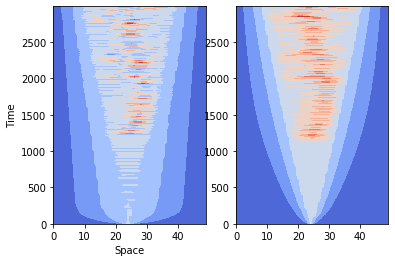

[1, 2]
844847.2


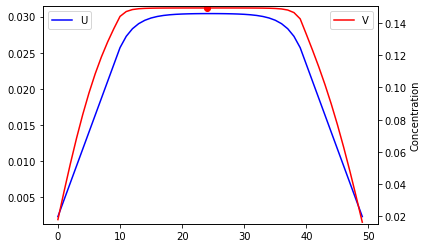

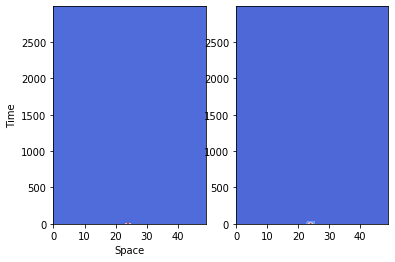

[0, 1]
1225633.0


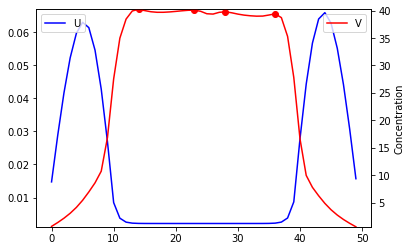

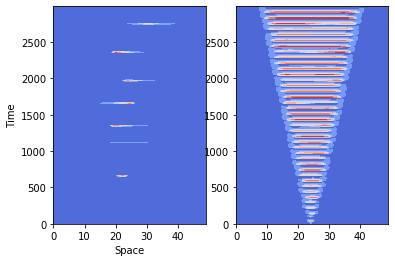

[0, 4]
153119.0


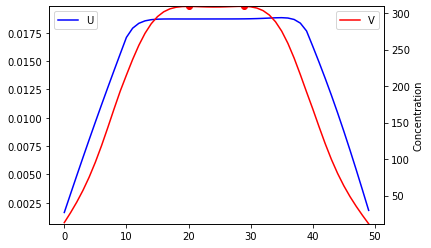

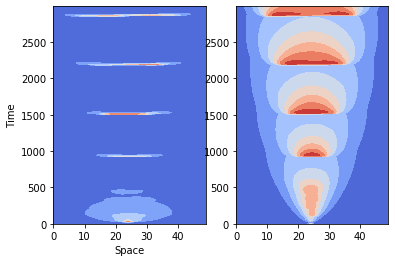

[0, 2]
474010.1


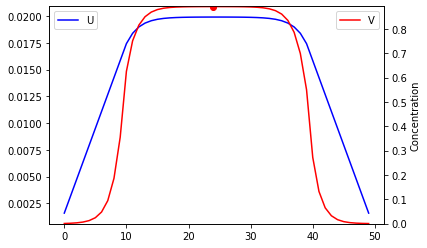

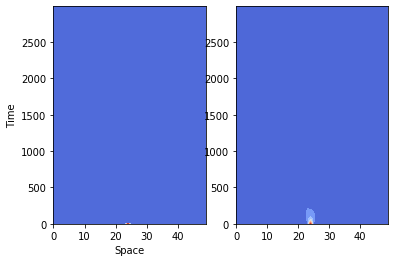

[0, 1]
1876941.0


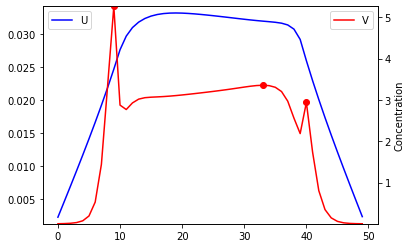

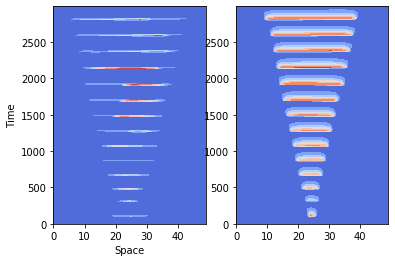

[0, 3]
1567333.0


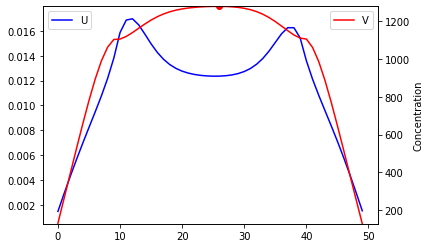

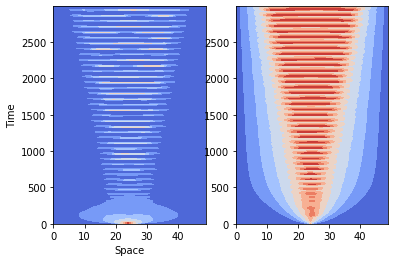

[0, 1]
895423.0


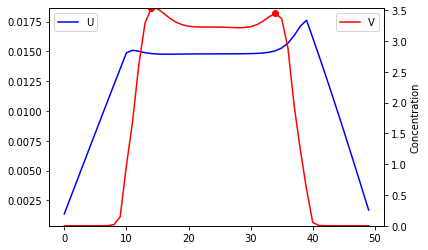

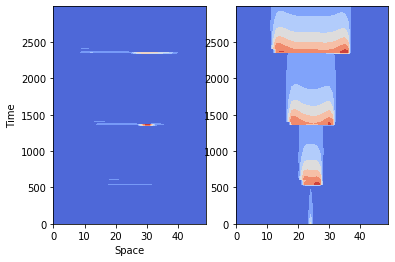

[0, 2]
809081.0


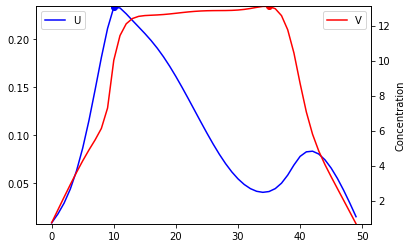

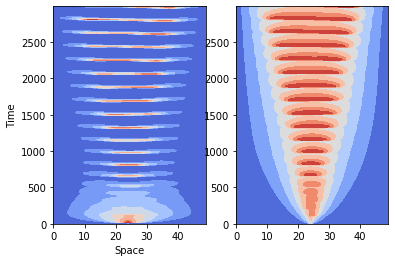

[1, 1]
230002.0


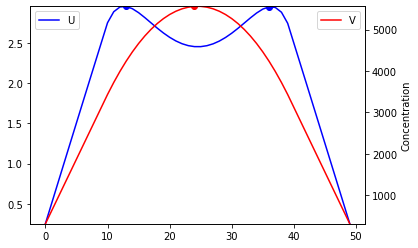

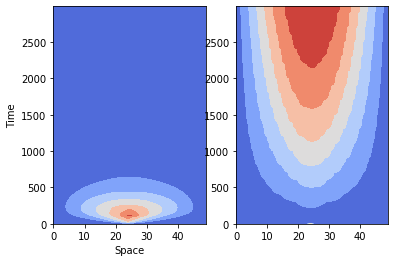

[2, 1]
peaks!!!
1902974.0


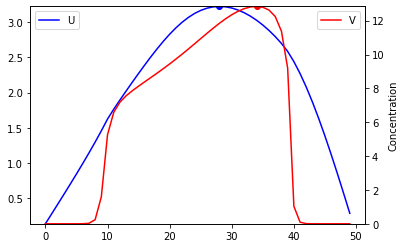

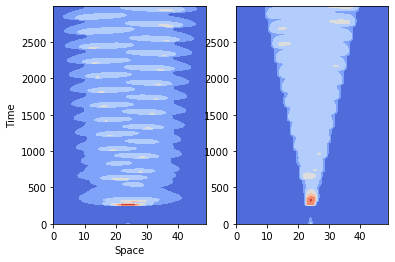

[1, 1]
1861244.2


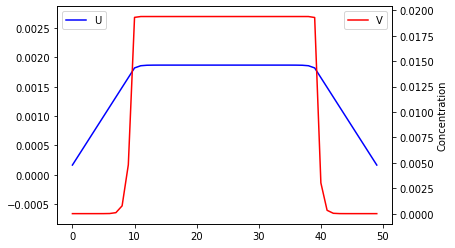

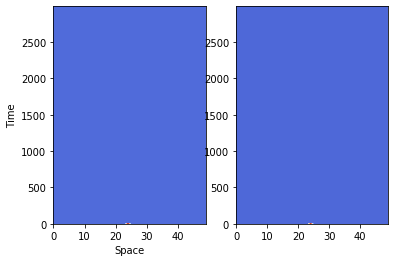

[0, 0]
869065.0


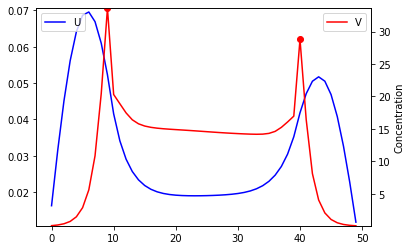

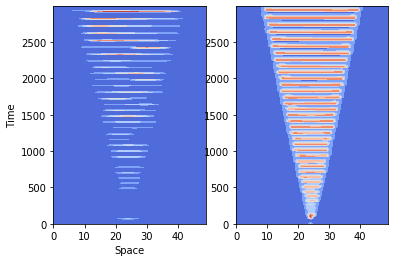

[0, 2]
1653588.0


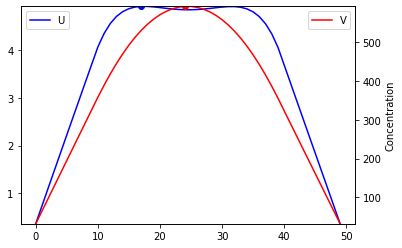

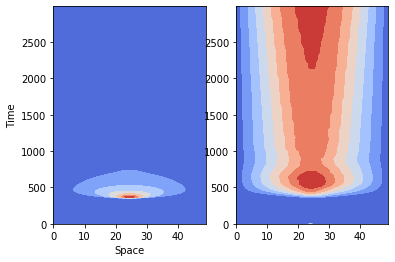

[1, 1]
757030.2


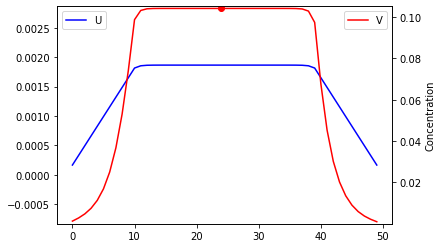

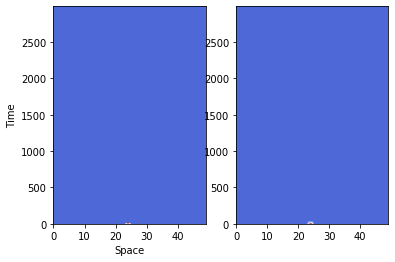

[0, 1]
813412.4


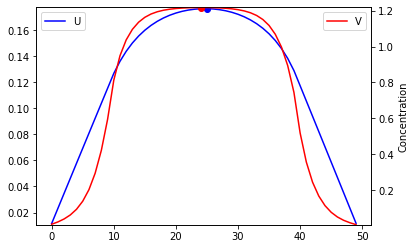

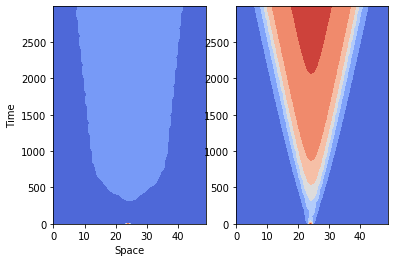

[1, 1]
629052.2


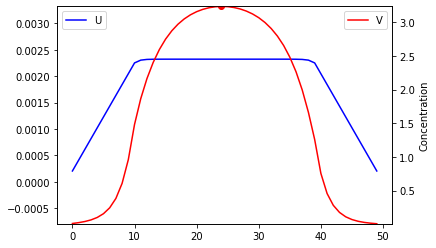

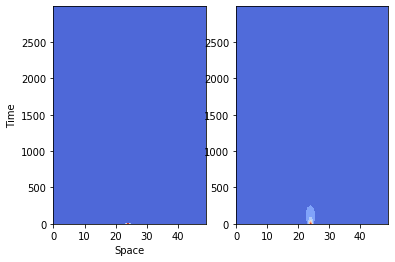

[0, 1]
242186.0


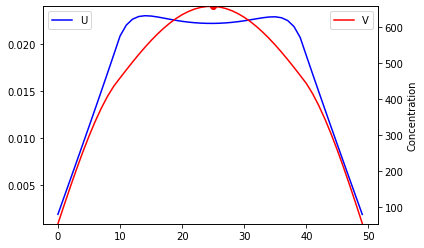

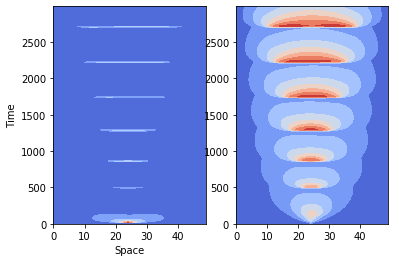

[0, 1]
922417.1


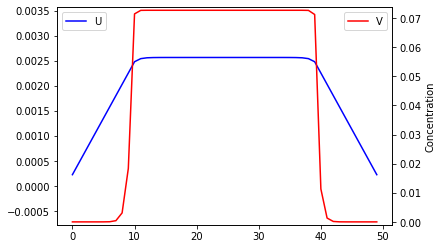

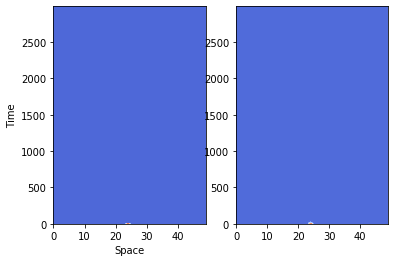

[0, 0]
1052782.0


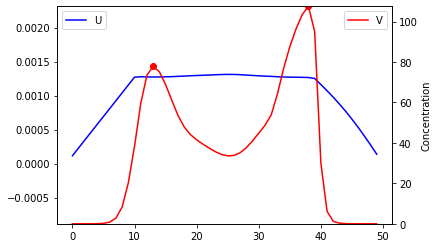

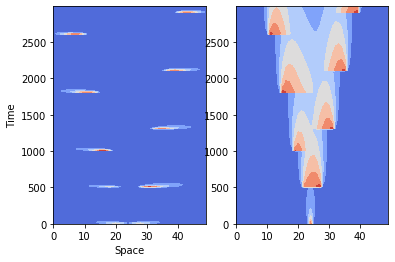

[0, 2]
1828004.0


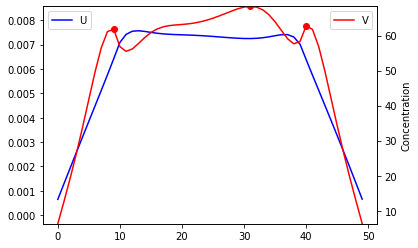

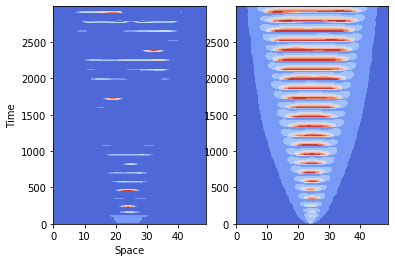

[0, 3]
297834.0


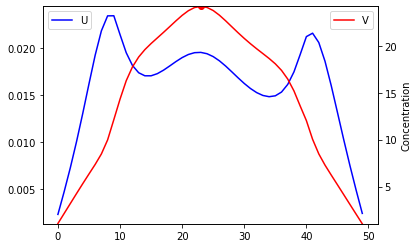

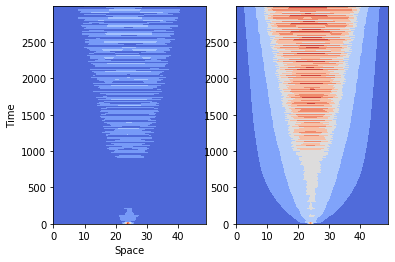

[0, 1]
975739.1


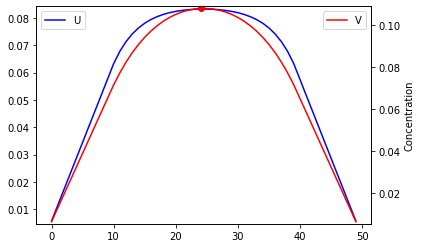

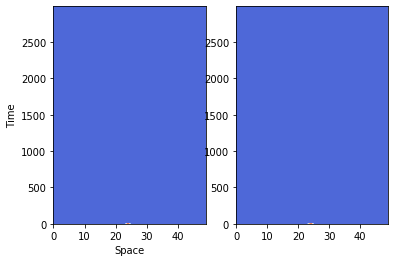

[0, 1]


In [8]:
for parID in parID_list[:100]:
    print(parID)
    U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
    U_record = pickle.load( open(modellingephemeral + '/growth/out/numerical/%s/%s/simulation/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
    peaks = countPeaks(U, U_record)
    print([len(peak) for peak in peaks])
    if len(peaks[0]) >1:
        print('peaks!!!')


In [6]:
parID=parID_list[0]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


TypeError: countPeaks() got an unexpected keyword argument 'showplot1D'

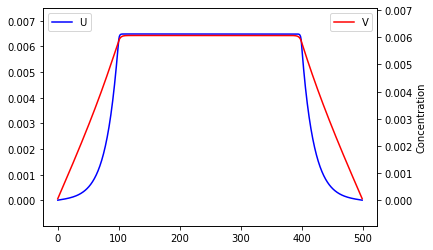

[1, 1]


In [ ]:
parID=parID_list[6]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


In [ ]:
parID=30997
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)


TypeError: <lambda>() missing 1 required positional argument: 'parID'

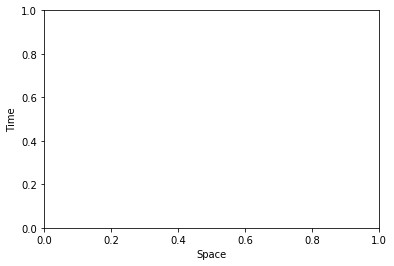

[1, 1]


In [ ]:
parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)
